# Breast Cancer Wisconsin

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math
import sklearn
import scipy

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# change the trees

## Loading Data

In [115]:
# dataset = pd.read_csv('datasets/Classification/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)
dataset = pd.read_csv("Classification_Datasets/3_Breast_Cancer_Wisconsin/Breast_Cancer_Wisconsin.data",header=None) 
dataset.head()

0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2

## Data preparation and Analysis

In [116]:
print(np.count_nonzero(dataset=="?"))
print(np.count_nonzero(dataset==np.nan))
dataset.isnull().sum()

16
0


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [117]:
dataset.isin(["?"]).sum()

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

In [118]:
dataset[dataset[6]=='?']

0   1   2   3   4   5  6   7   8   9   10
23   1057013   8   4   5   1   2  ?   7   3   1   4
40   1096800   6   6   6   9   6  ?   7   8   1   2
139  1183246   1   1   1   1   1  ?   2   1   1   2
145  1184840   1   1   3   1   2  ?   2   1   1   2
158  1193683   1   1   2   1   3  ?   1   1   1   2
164  1197510   5   1   1   1   2  ?   3   1   1   2
235  1241232   3   1   4   1   2  ?   3   1   1   2
249   169356   3   1   1   1   2  ?   3   1   1   2
275   432809   3   1   3   1   2  ?   2   1   1   2
292   563649   8   8   8   1   2  ?   6  10   1   4
294   606140   1   1   1   1   2  ?   2   1   1   2
297    61634   5   4   3   1   2  ?   2   3   1   2
315   704168   4   6   5   6   7  ?   4   9   1   2
321   733639   3   1   1   1   2  ?   3   1   1   2
411  1238464   1   1   1   1   1  ?   2   1   1   2
617  1057067   1   1   1   1   1  ?   1   1   1   2

In [119]:
dataset.shape

(699, 11)

In [120]:
print(dataset.iloc[:,6])

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: 6, Length: 699, dtype: object


In [121]:
impute = SimpleImputer(missing_values="?", strategy='most_frequent')
data = impute.fit_transform(dataset)

print(np.count_nonzero(data=="?"))

0


In [122]:
dataset.shape

(699, 11)

In [123]:
frequency = dataset.iloc[:,-1].value_counts()
print(frequency)
print("-------")

2    458
4    241
Name: 10, dtype: int64
-------


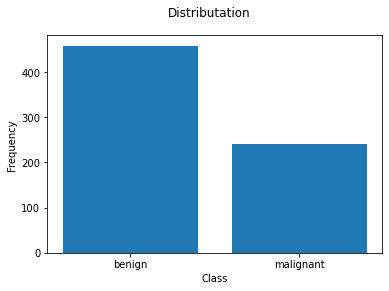

In [203]:
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Class')
# FROM DESCRIPTION OF THE DATA
plt.bar( ("benign","malignant"), frequency)
plt.suptitle("Distributation")
plt.show()

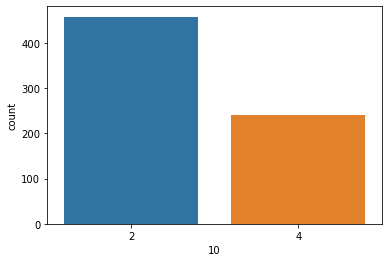

In [125]:
sns.countplot(x=10, data= dataset);

In [126]:
print(dataset.columns)
print(dataset.shape)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
(699, 11)


In [127]:
dataset.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [129]:
pd_data = pd.DataFrame(data,columns =["ID", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                                     "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei","Bland Chromatin",
                                      "Normal Nucleoli", "Mitoses", "Class"])
pd_data.head()

ID Clump Thickness Uniformity of Cell Size Uniformity of Cell Shape  \
0  1000025               5                       1                        1   
1  1002945               5                       4                        4   
2  1015425               3                       1                        1   
3  1016277               6                       8                        8   
4  1017023               4                       1                        1   

  Marginal Adhesion Single Epithelial Cell Size Bare Nuclei Bland Chromatin  \
0                 1                           2           1               3   
1                 5                           7          10               3   
2                 1                           2           2               3   
3                 1                           3           4               3   
4                 3                           2           1               3   

  Normal Nucleoli Mitoses Class  
0               1       1     2  
1               2       1     2  
2               1       1     2  
3               7       1     2  
4               1       1     2

In [130]:
pd_data= pd_data.drop(columns='ID')
pd_data.head()

Clump Thickness Uniformity of Cell Size Uniformity of Cell Shape  \
0               5                       1                        1   
1               5                       4                        4   
2               3                       1                        1   
3               6                       8                        8   
4               4                       1                        1   

  Marginal Adhesion Single Epithelial Cell Size Bare Nuclei Bland Chromatin  \
0                 1                           2           1               3   
1                 5                           7          10               3   
2                 1                           2           2               3   
3                 1                           3           4               3   
4                 3                           2           1               3   

  Normal Nucleoli Mitoses Class  
0               1       1     2  
1               2       1     2  
2               1       1     2  
3               7       1     2  
4               1       1     2

In [131]:
pd_data.shape

(699, 10)

In [132]:
pd_data.describe().T

count unique top freq
Clump Thickness               699     10   1  145
Uniformity of Cell Size       699     10   1  384
Uniformity of Cell Shape      699     10   1  353
Marginal Adhesion             699     10   1  407
Single Epithelial Cell Size   699     10   2  386
Bare Nuclei                   699     10   1  418
Bland Chromatin               699     10   2  166
Normal Nucleoli               699     10   1  443
Mitoses                       699      9   1  579
Class                         699      2   2  458

<AxesSubplot:>

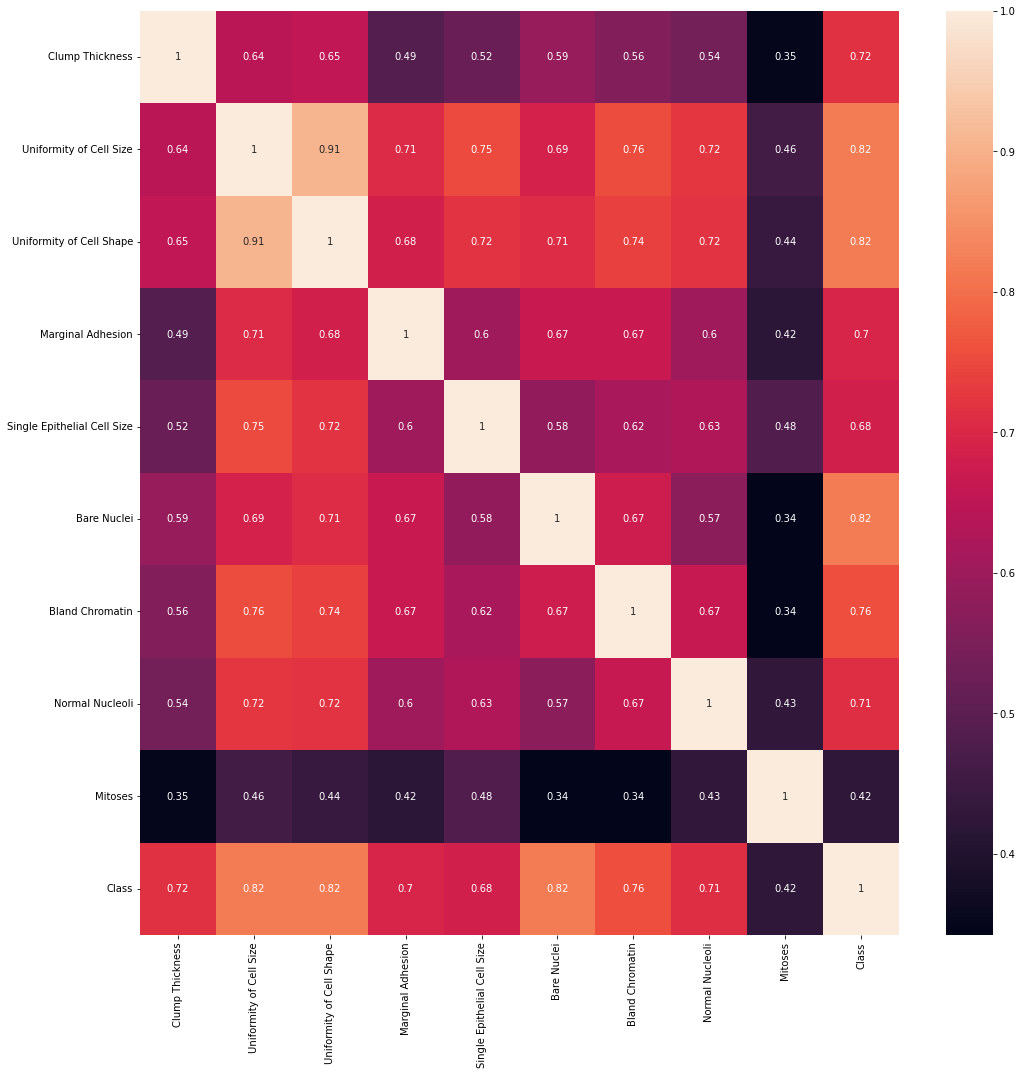

In [133]:
plt.figure(figsize=(17,17))
sns.heatmap(pd_data.astype(int).corr(), annot =True)


              precision    recall  f1-score   support

           2       0.91      0.94      0.93        66
           4       0.89      0.85      0.87        39

    accuracy                           0.90       105
   macro avg       0.90      0.89      0.90       105
weighted avg       0.90      0.90      0.90       105

Uniformity of Cell Size


<AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='count'>

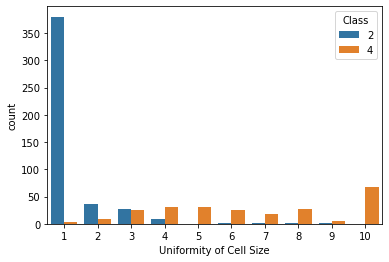

In [160]:
XX = pd_data.iloc[:,:-1]
yy = pd_data["Class"]
X_trn, X_tst, y_trn, y_tst = train_test_split(XX.astype(int), yy.astype(int), test_size=0.15, random_state=0)

impo = AdaBoostClassifier(n_estimators=1).fit(X_trn,y_trn)
pred = impo.predict(X_tst)
print(classification_report(y_tst,pred))
print (XX.columns[impo.feature_importances_.argmax()])
sns.countplot(data=pd_data, x="Uniformity of Cell Size",hue="Class")

In [163]:
pd_data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

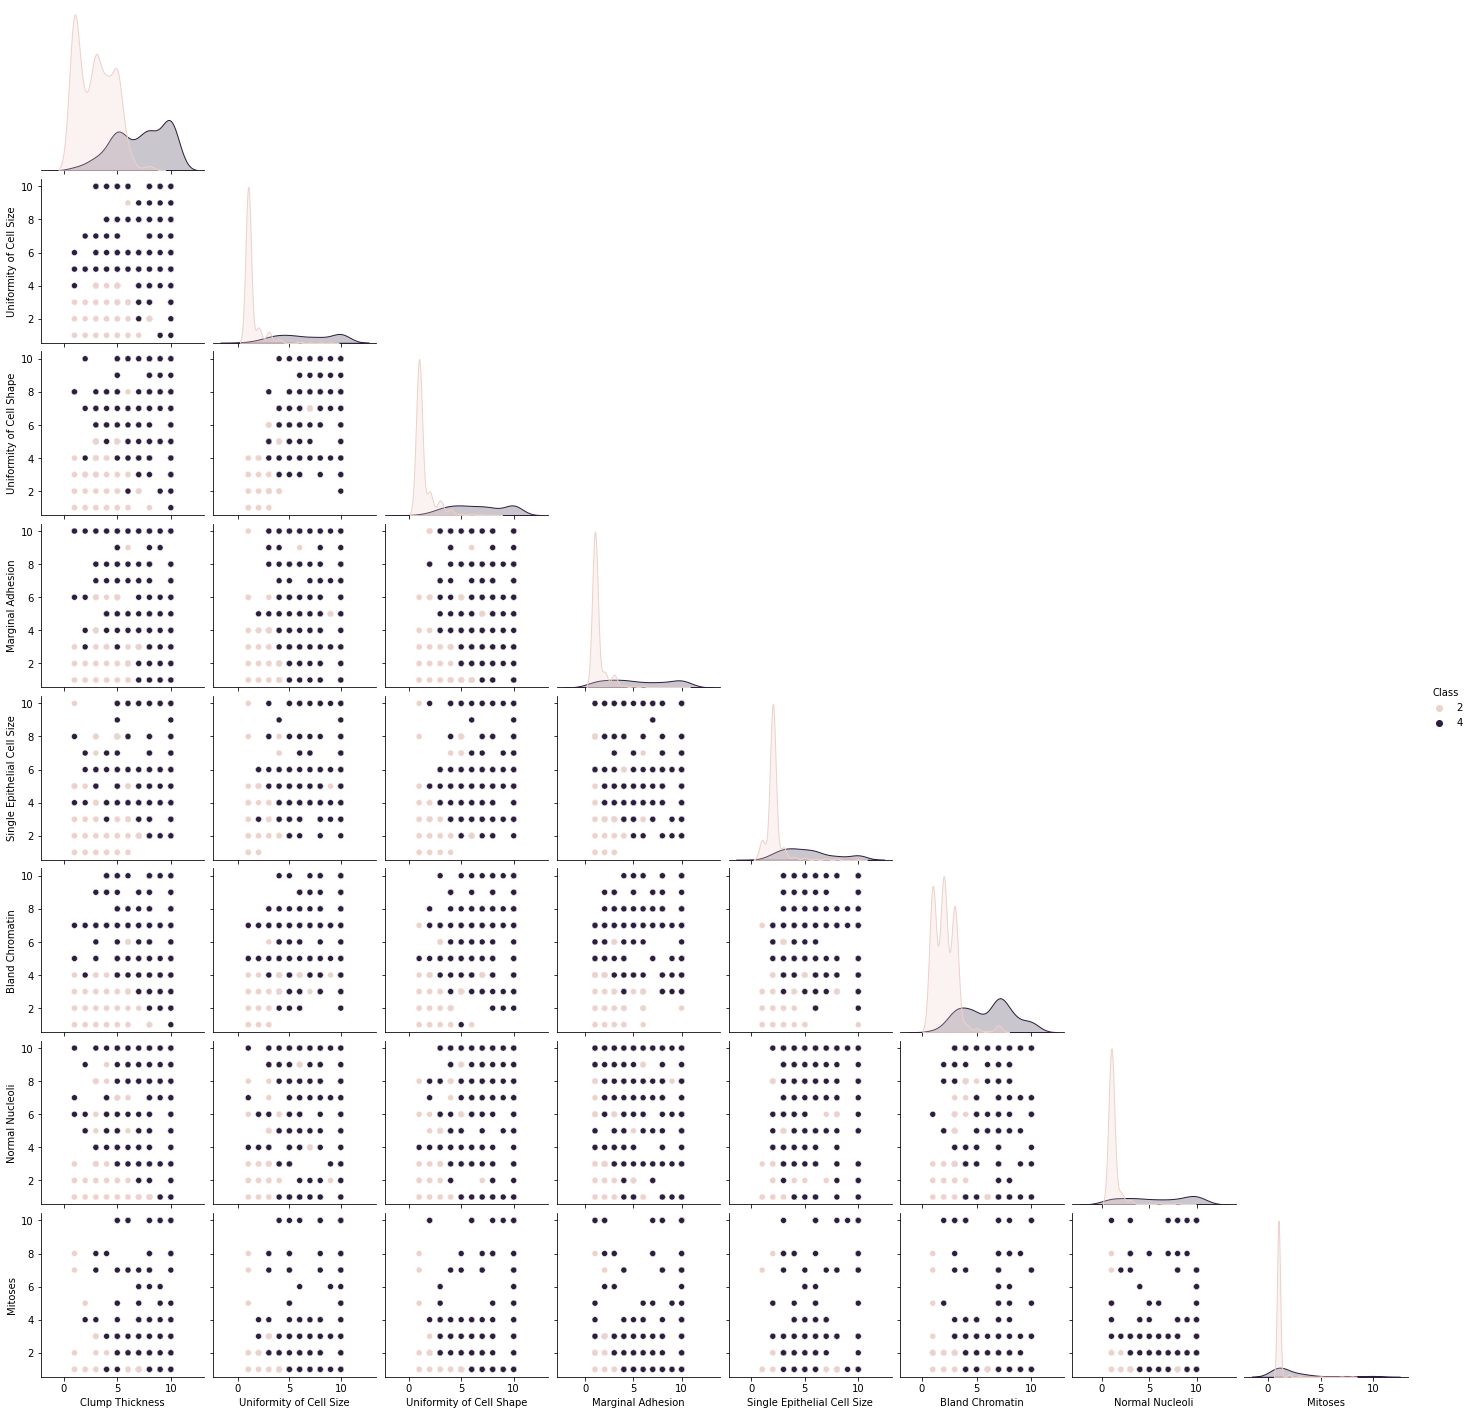

In [142]:
sns.pairplot(pd_data,corner=True, hue="Class")

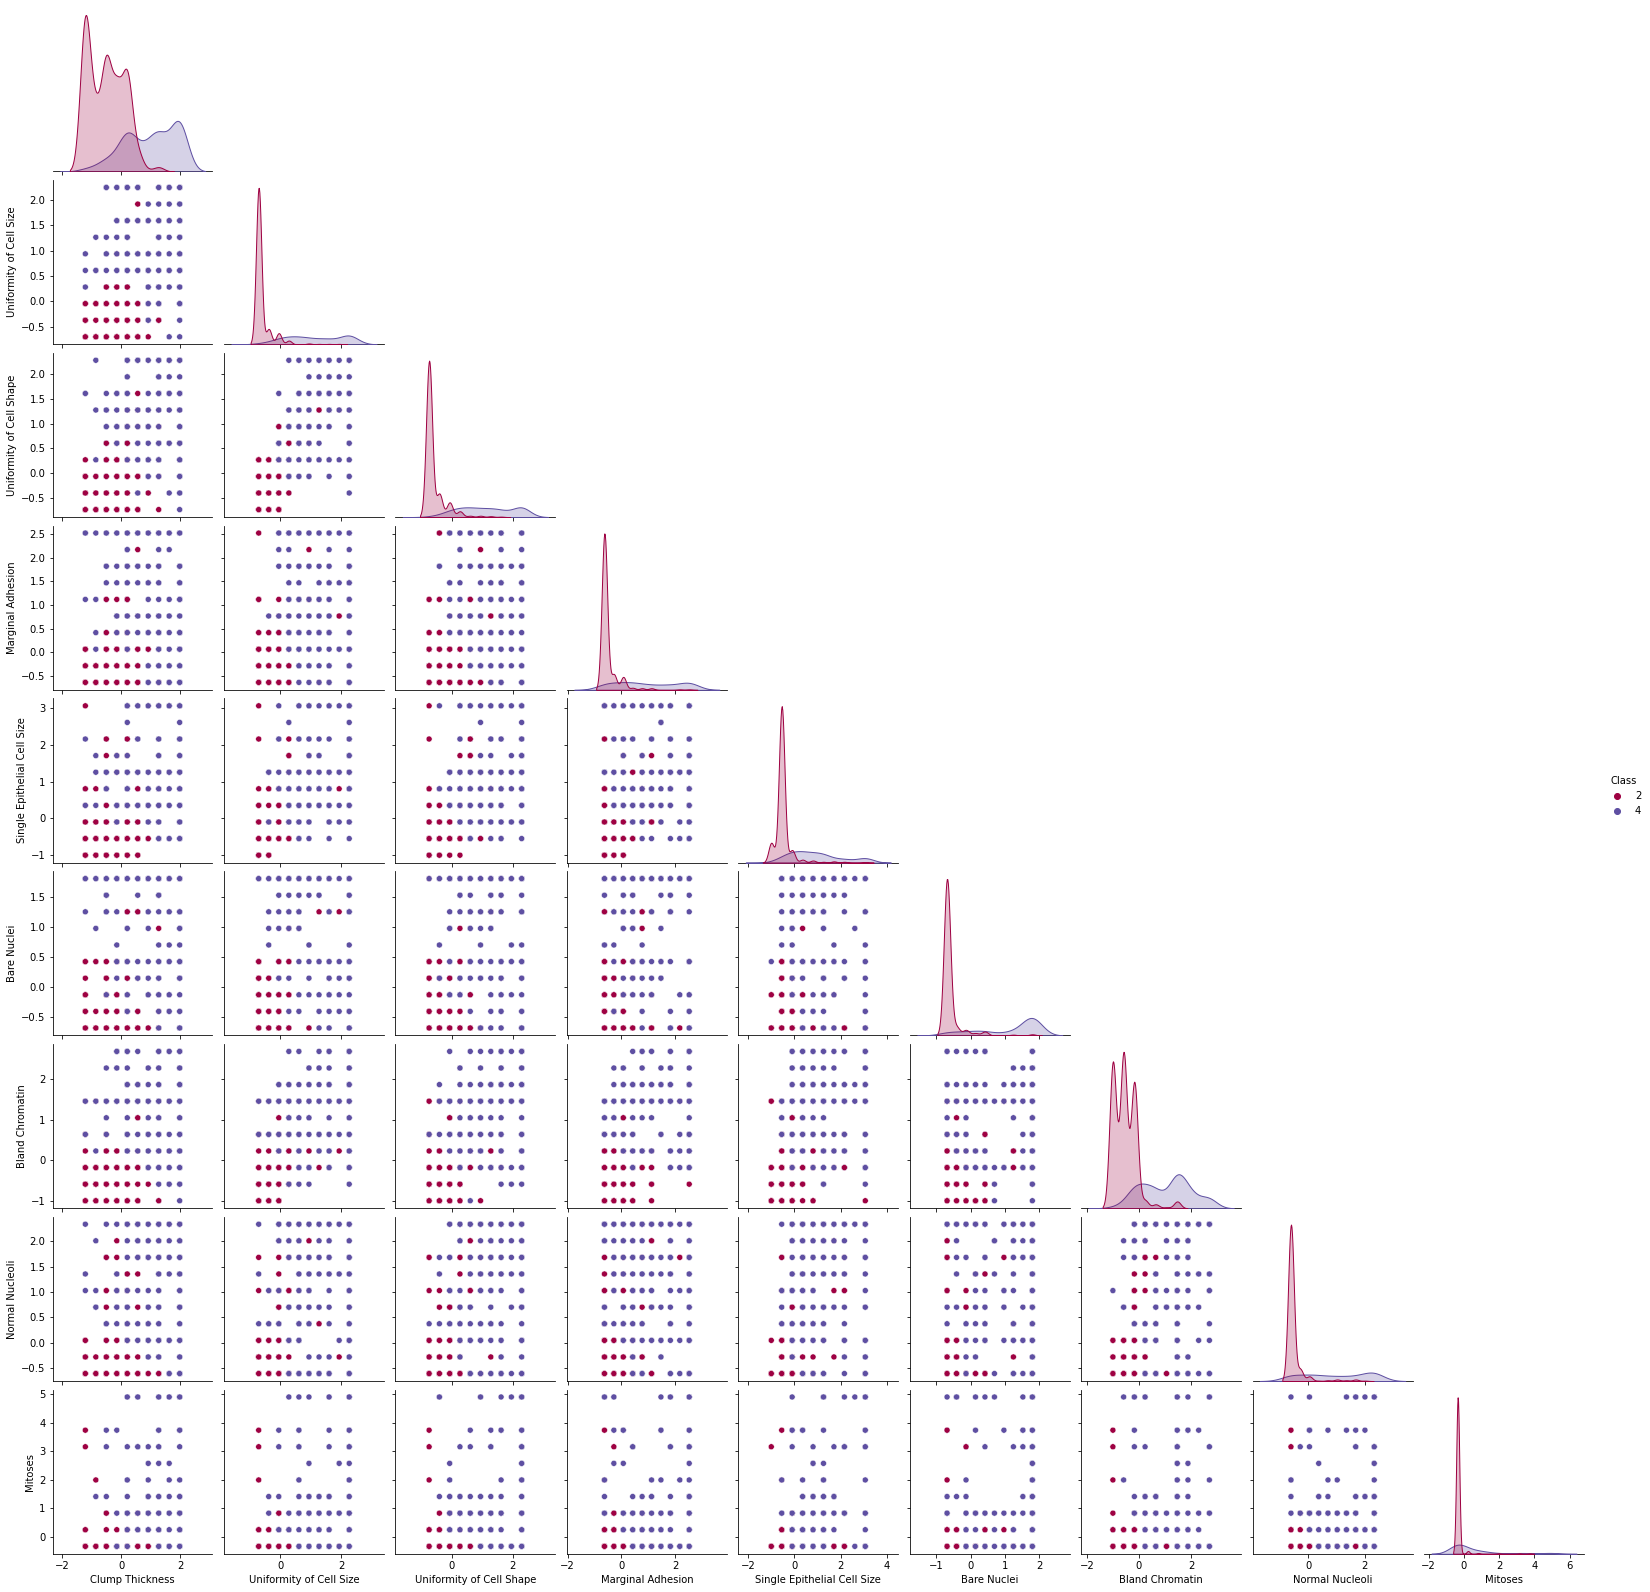

In [143]:
stdata = pd_data.copy()
stdata.iloc[:,:-1] =  StandardScaler().fit_transform(stdata.iloc[:,:-1])

sns.pairplot(stdata,corner=True, hue="Class", palette='Spectral')

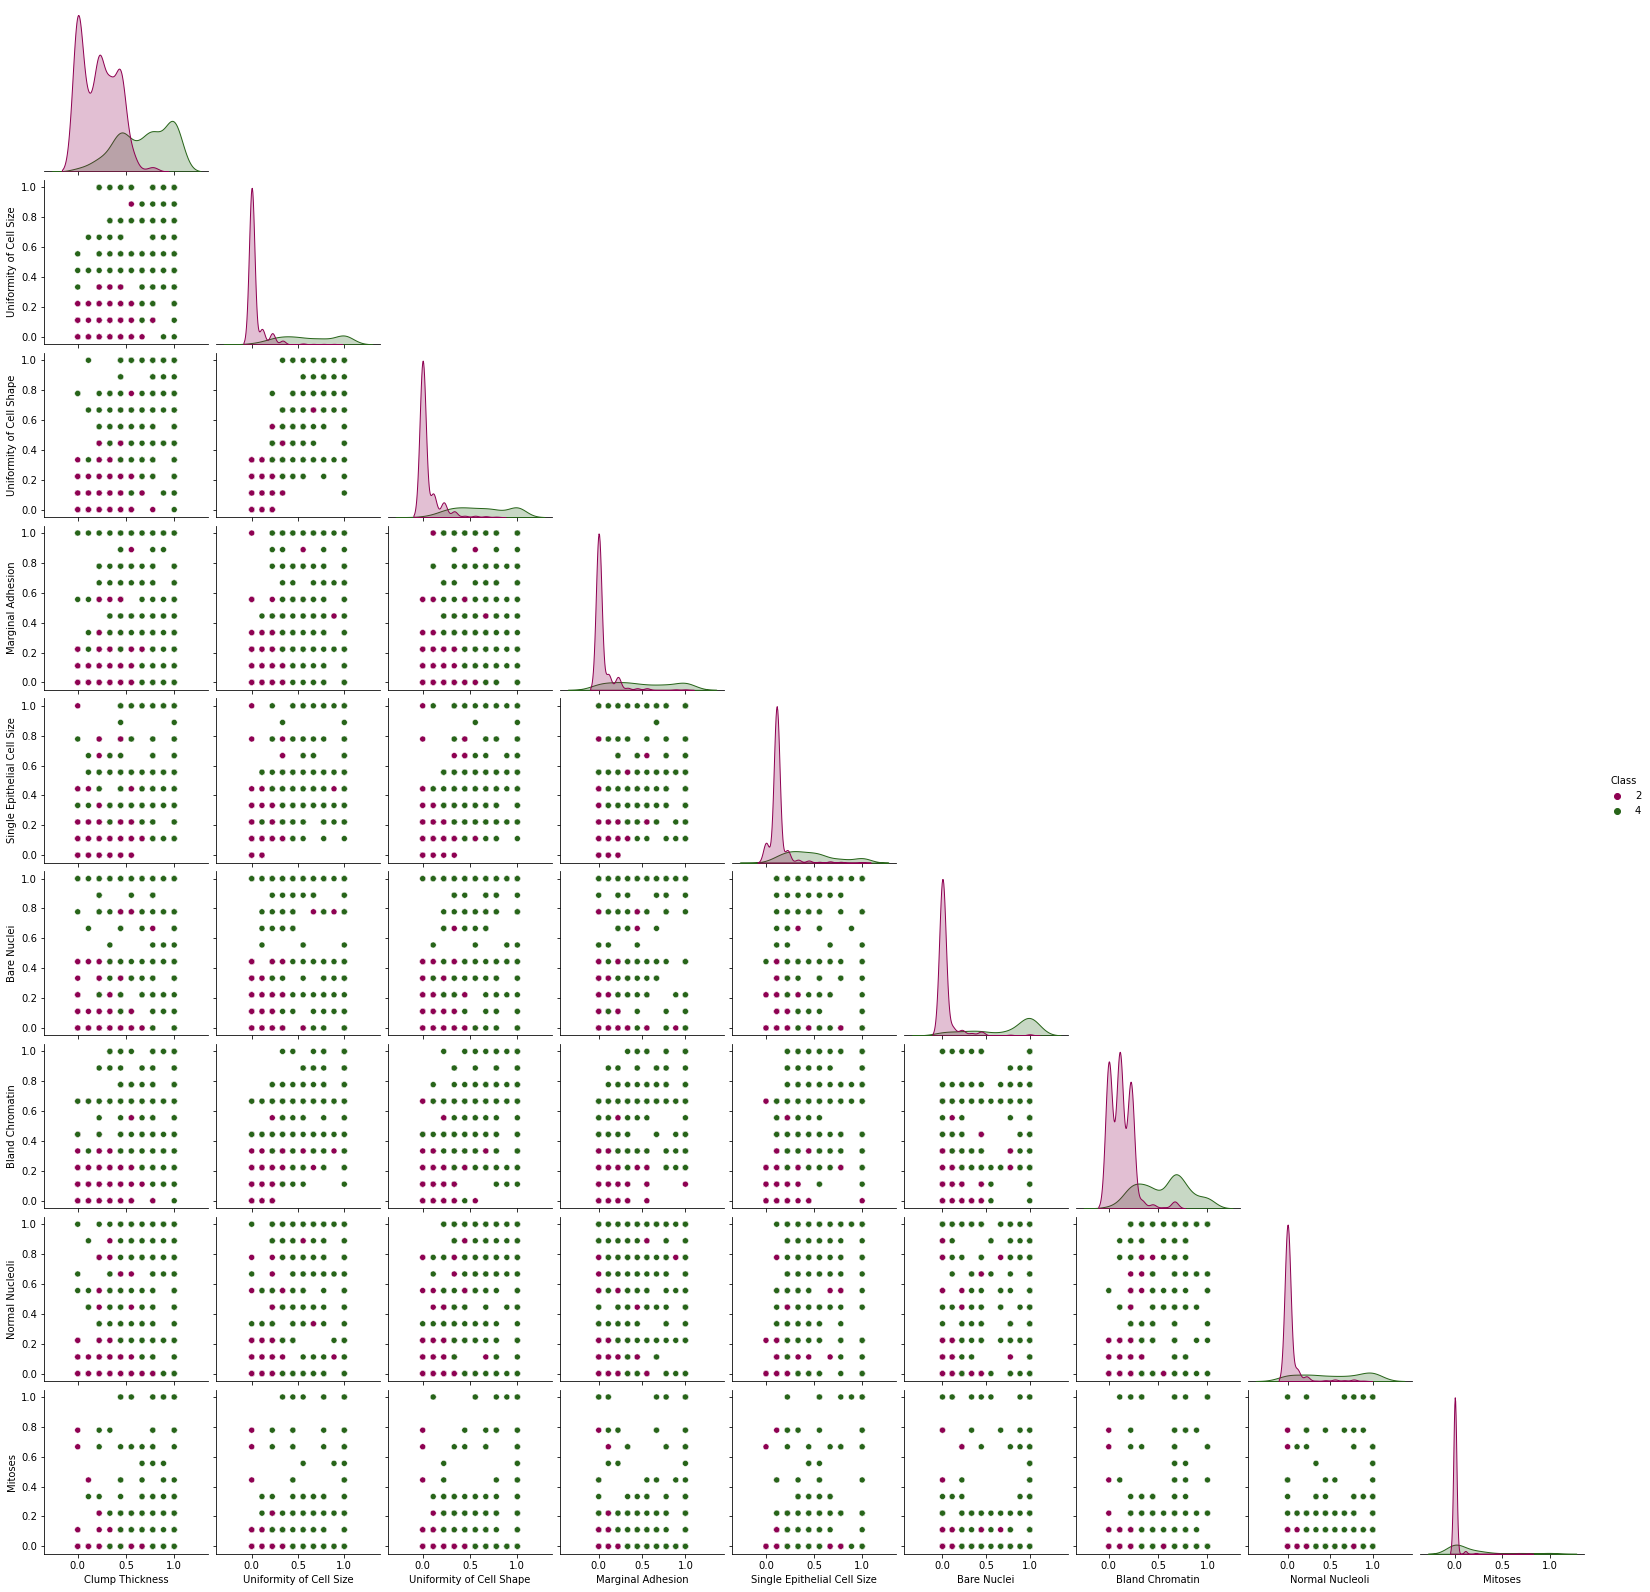

In [137]:
MMtdata = pd_data.copy()
MMtdata.iloc[:,:-1] =  MinMaxScaler().fit_transform(MMtdata.iloc[:,:-1])

sns.pairplot(MMtdata,corner=True, hue="Class", palette='PiYG')

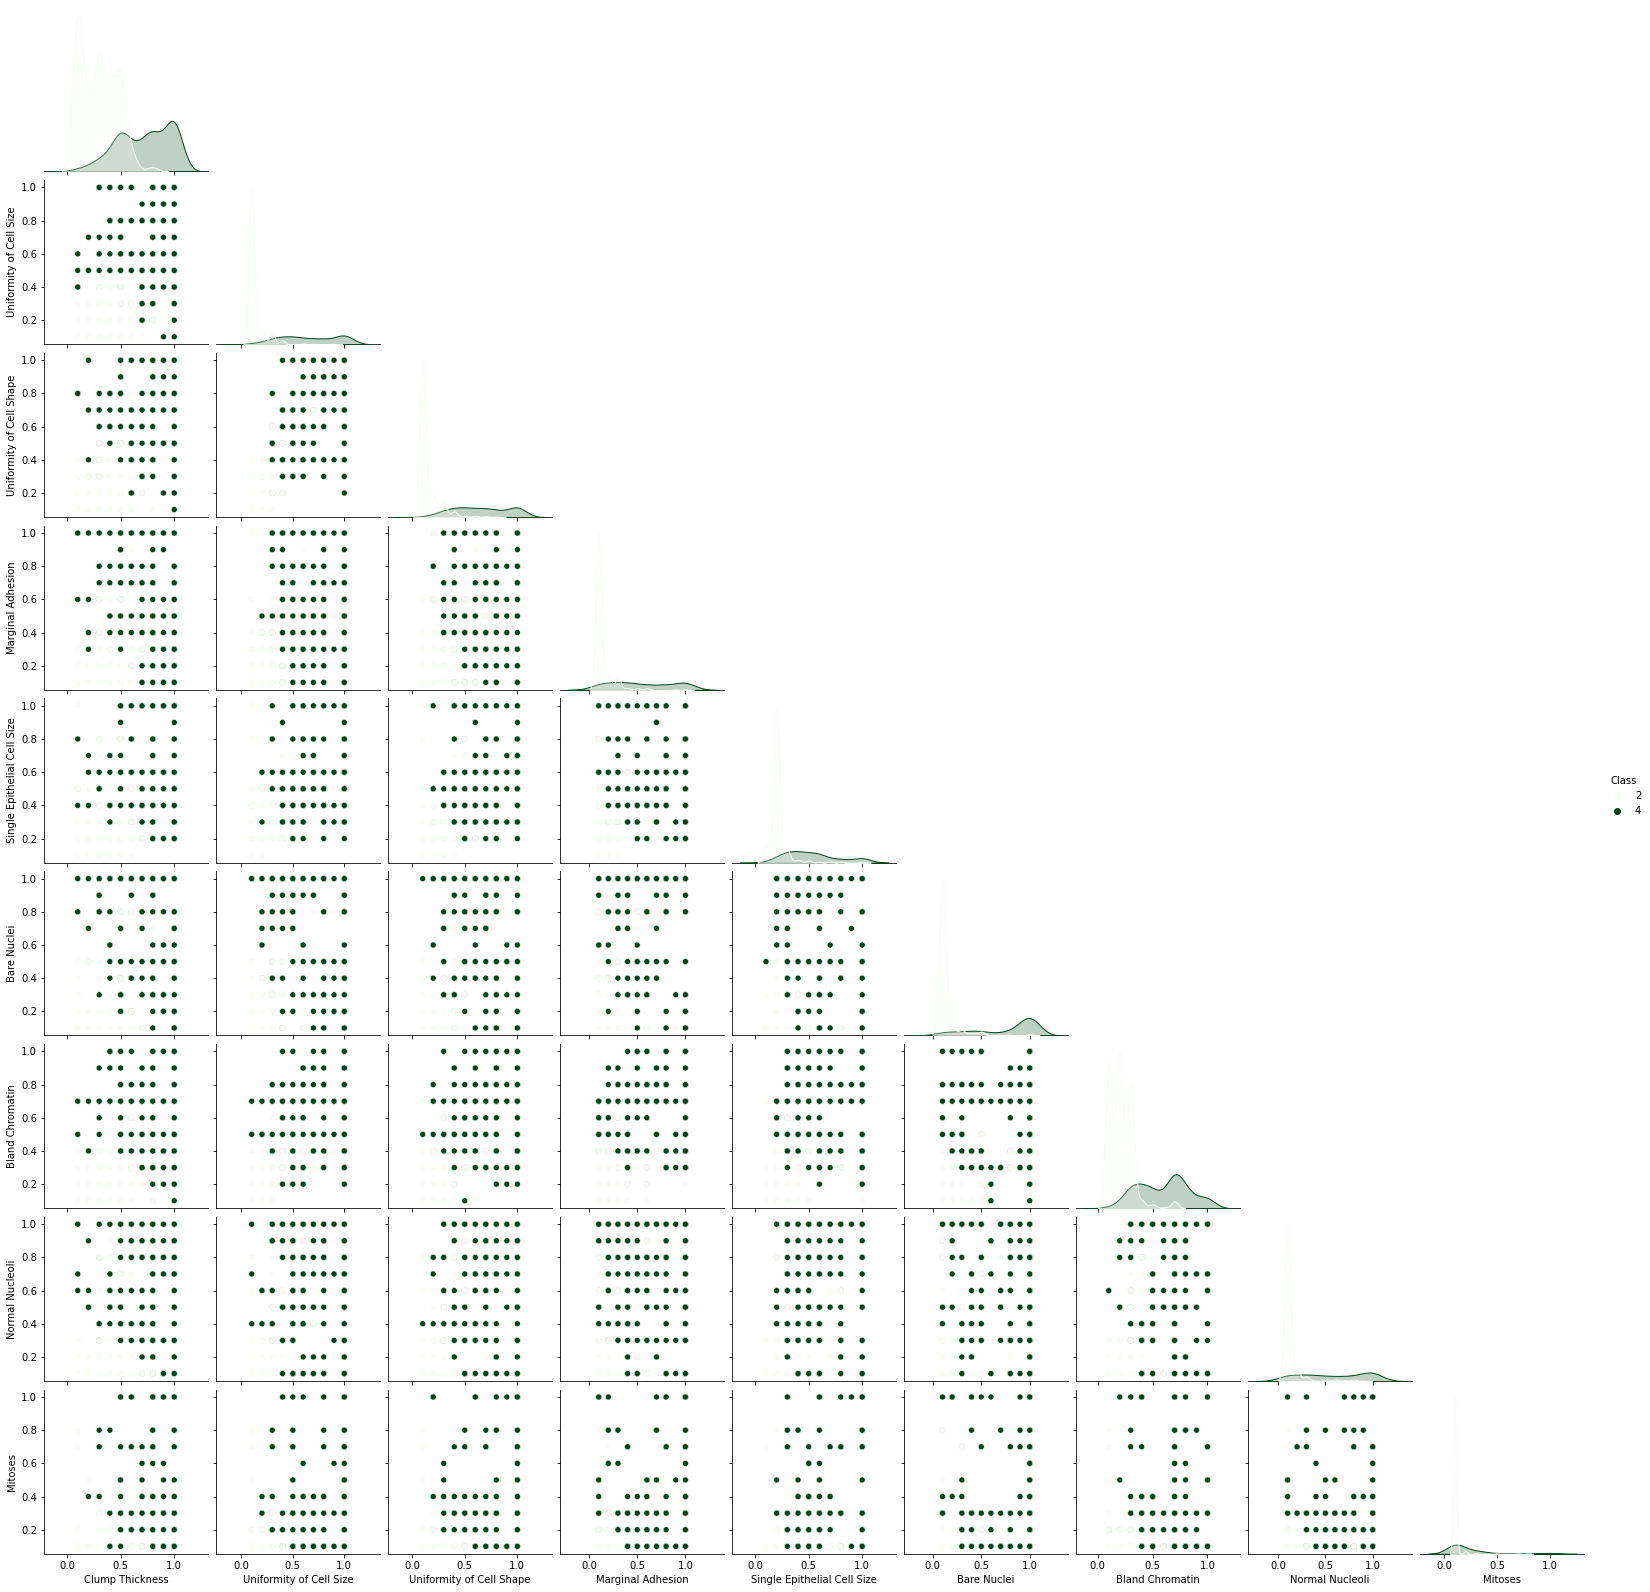

In [138]:
MBtdata = pd_data.copy()
MBtdata.iloc[:,:-1] =  MaxAbsScaler().fit_transform(MBtdata.iloc[:,:-1])

sns.pairplot(MBtdata,corner=True, hue="Class", palette='Greens')

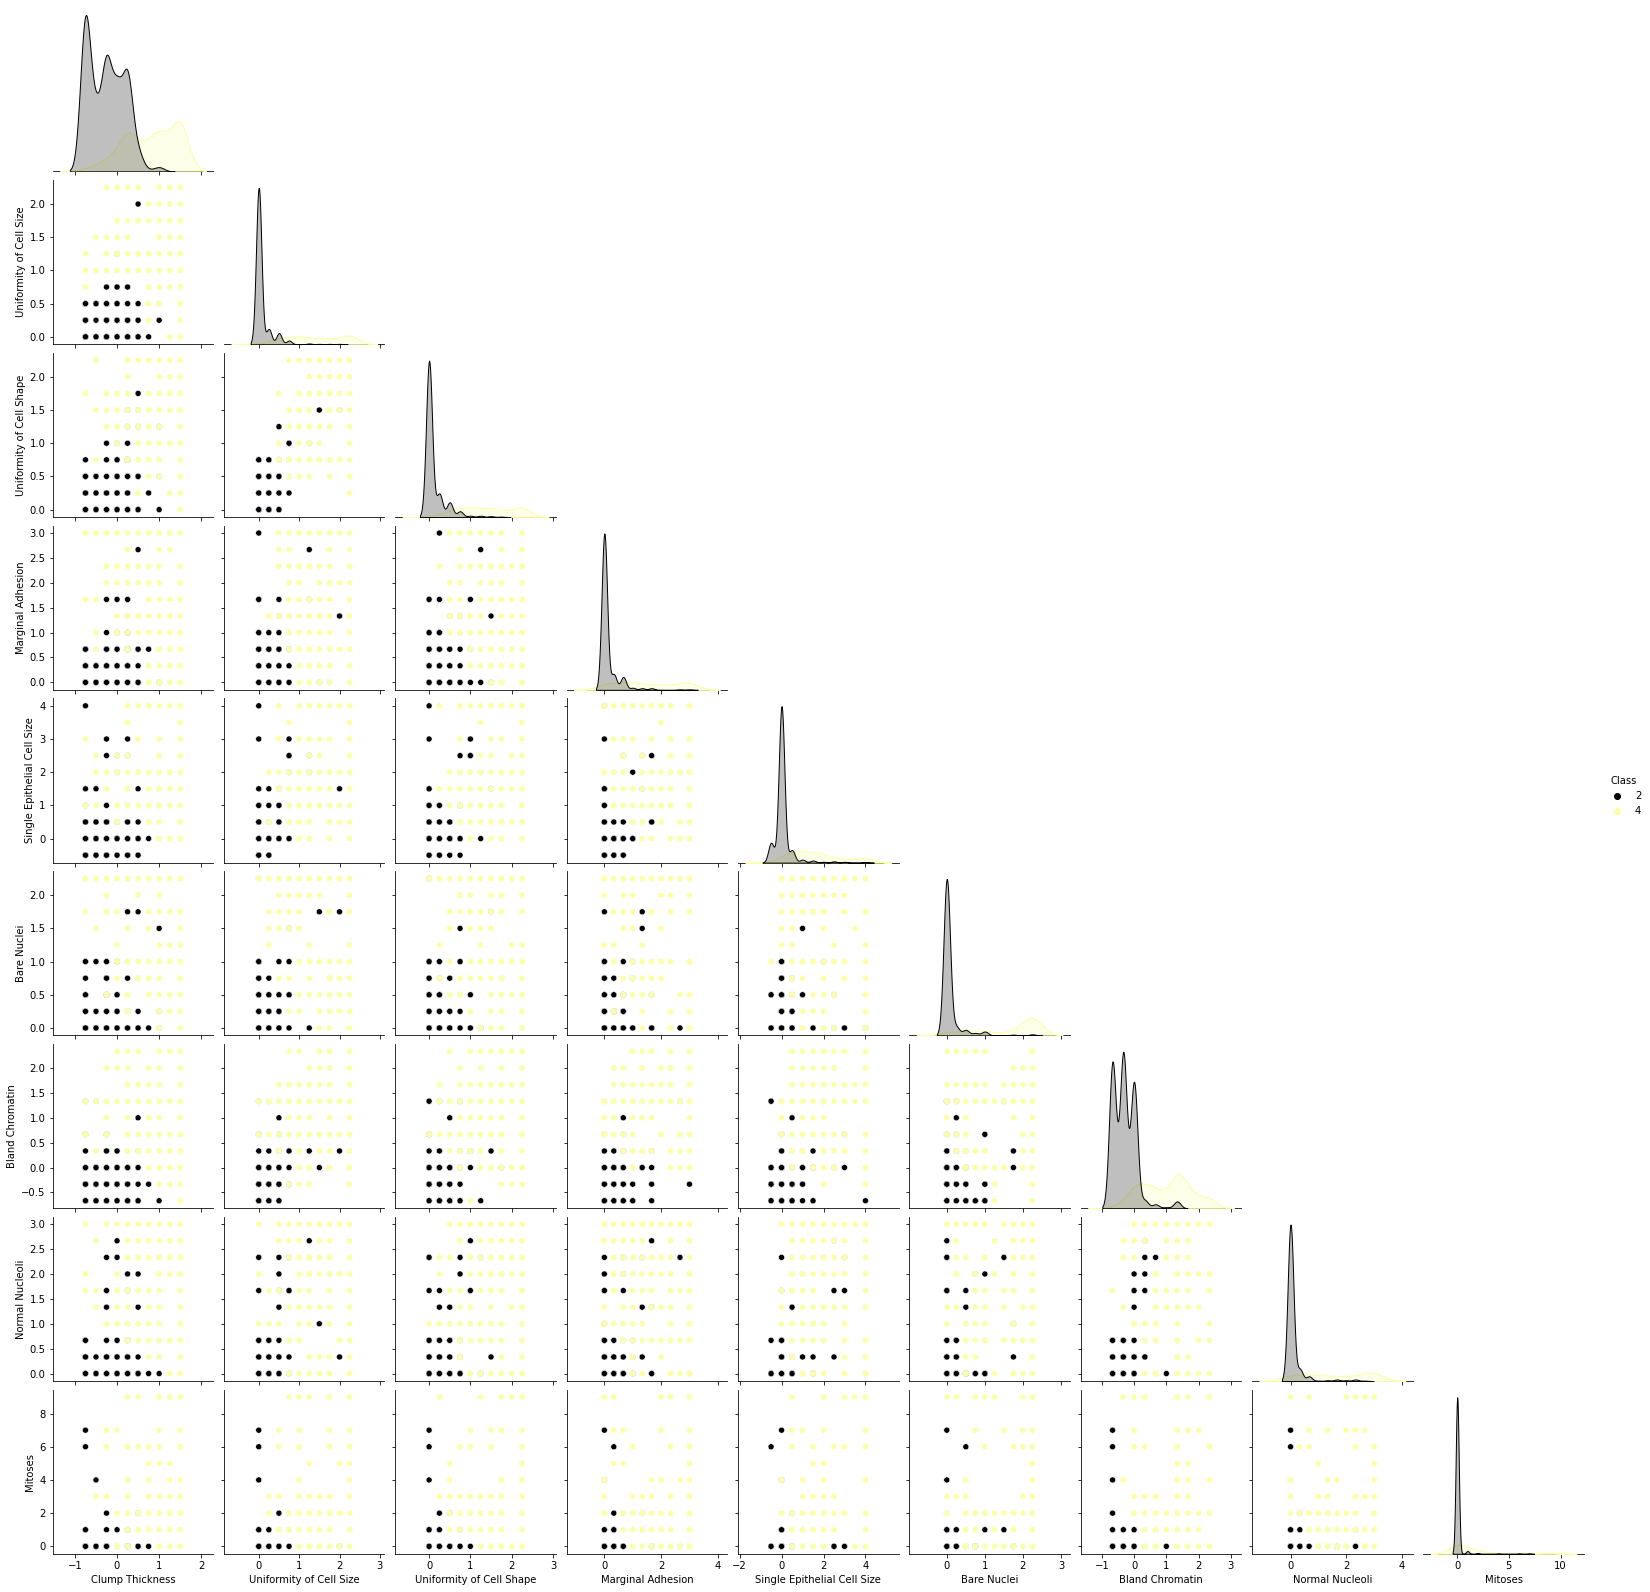

In [139]:
Rdata = pd_data.copy()
Rdata.iloc[:,:-1] =  RobustScaler().fit_transform(Rdata.iloc[:,:-1])

sns.pairplot(Rdata,corner=True, hue="Class", palette='inferno')

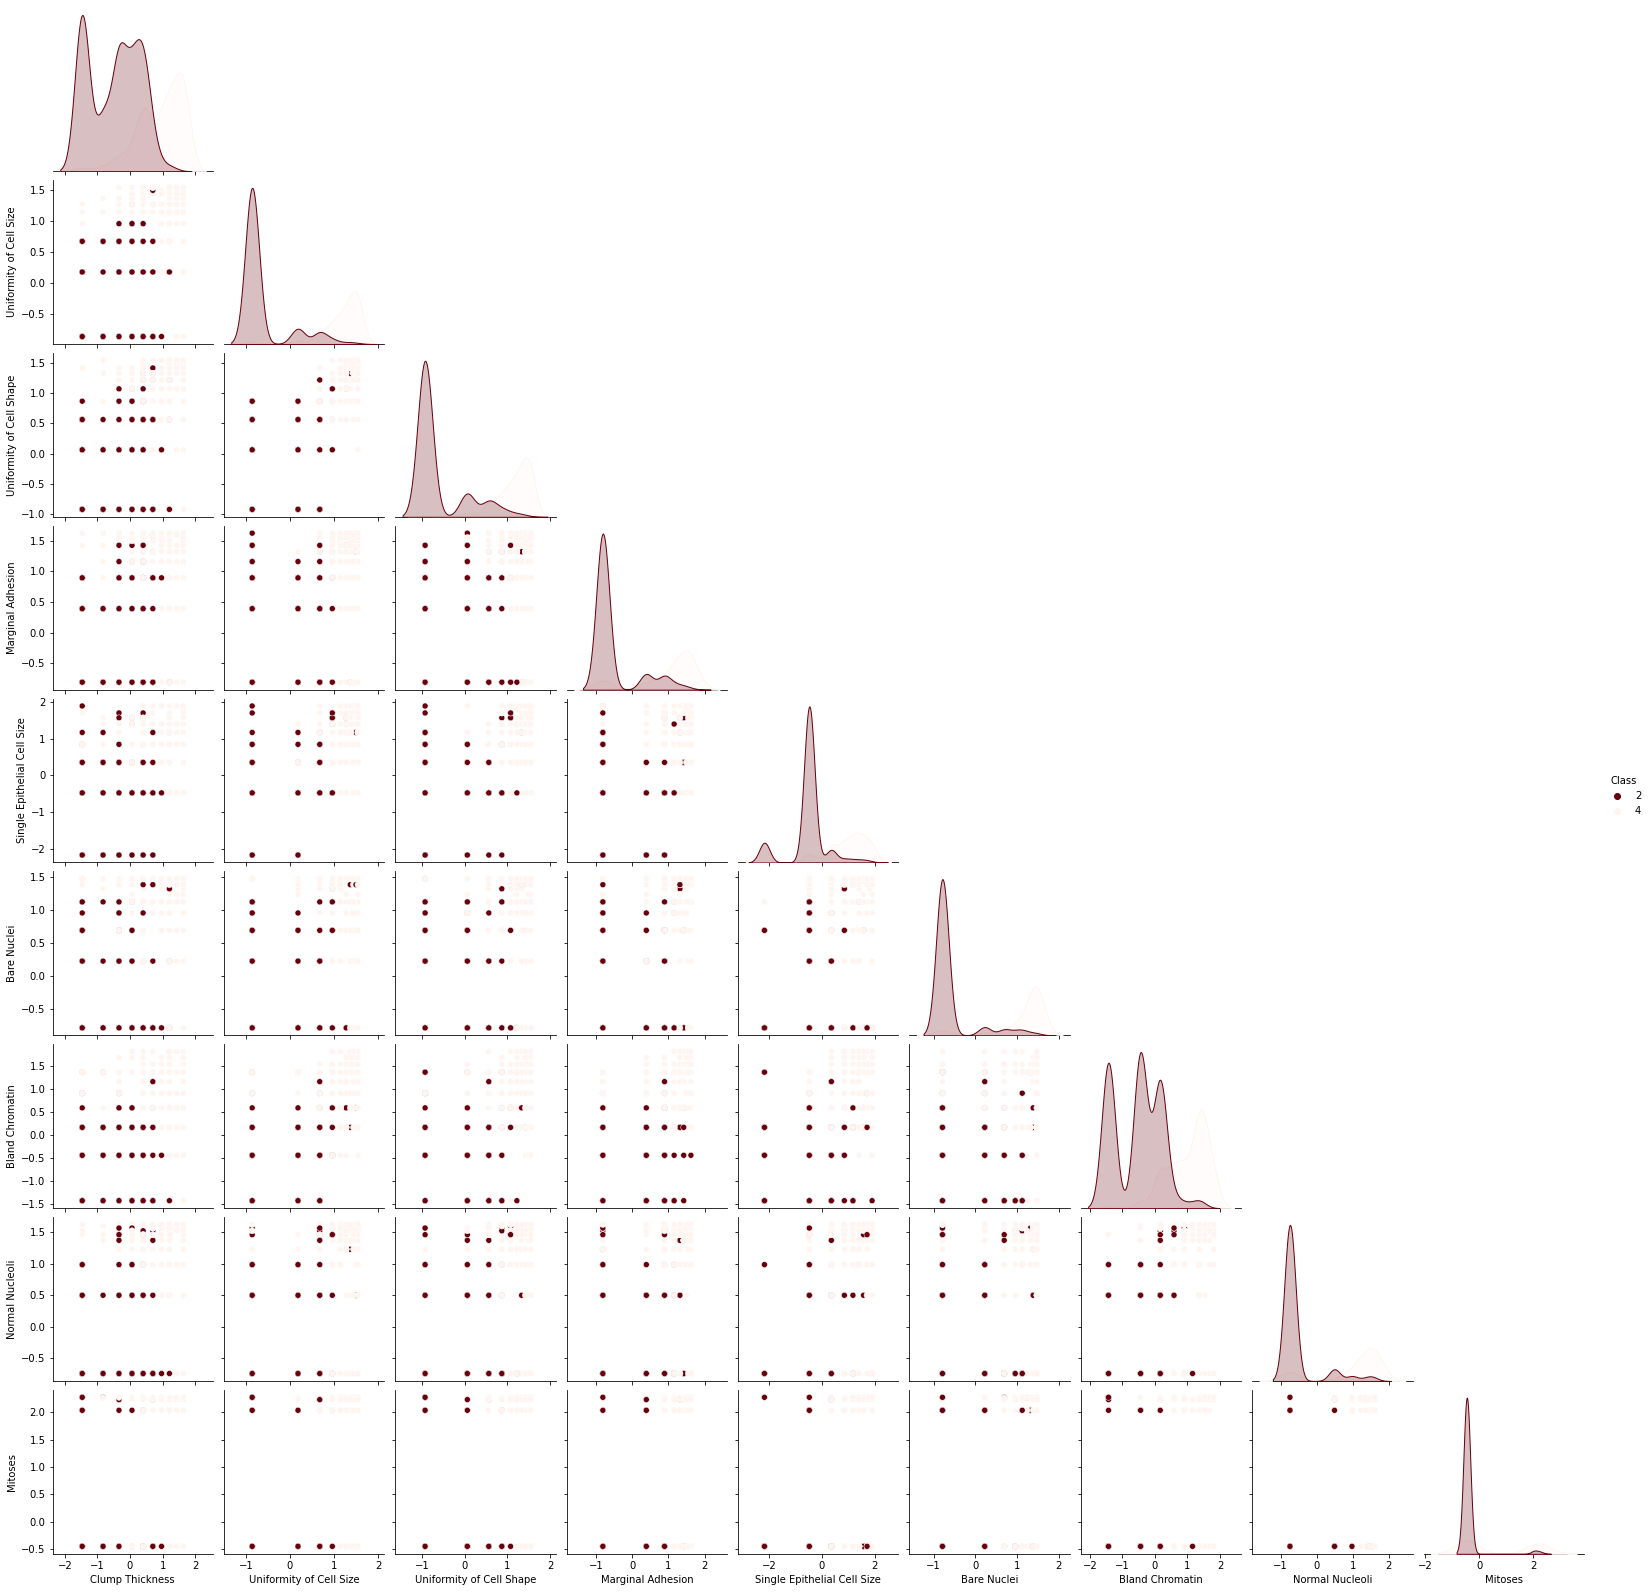

In [140]:
POWdata = pd_data.copy()
POWdata.iloc[:,:-1] =  PowerTransformer().fit_transform(POWdata.iloc[:,:-1])

sns.pairplot(POWdata,corner=True, hue="Class", palette='Reds_r')

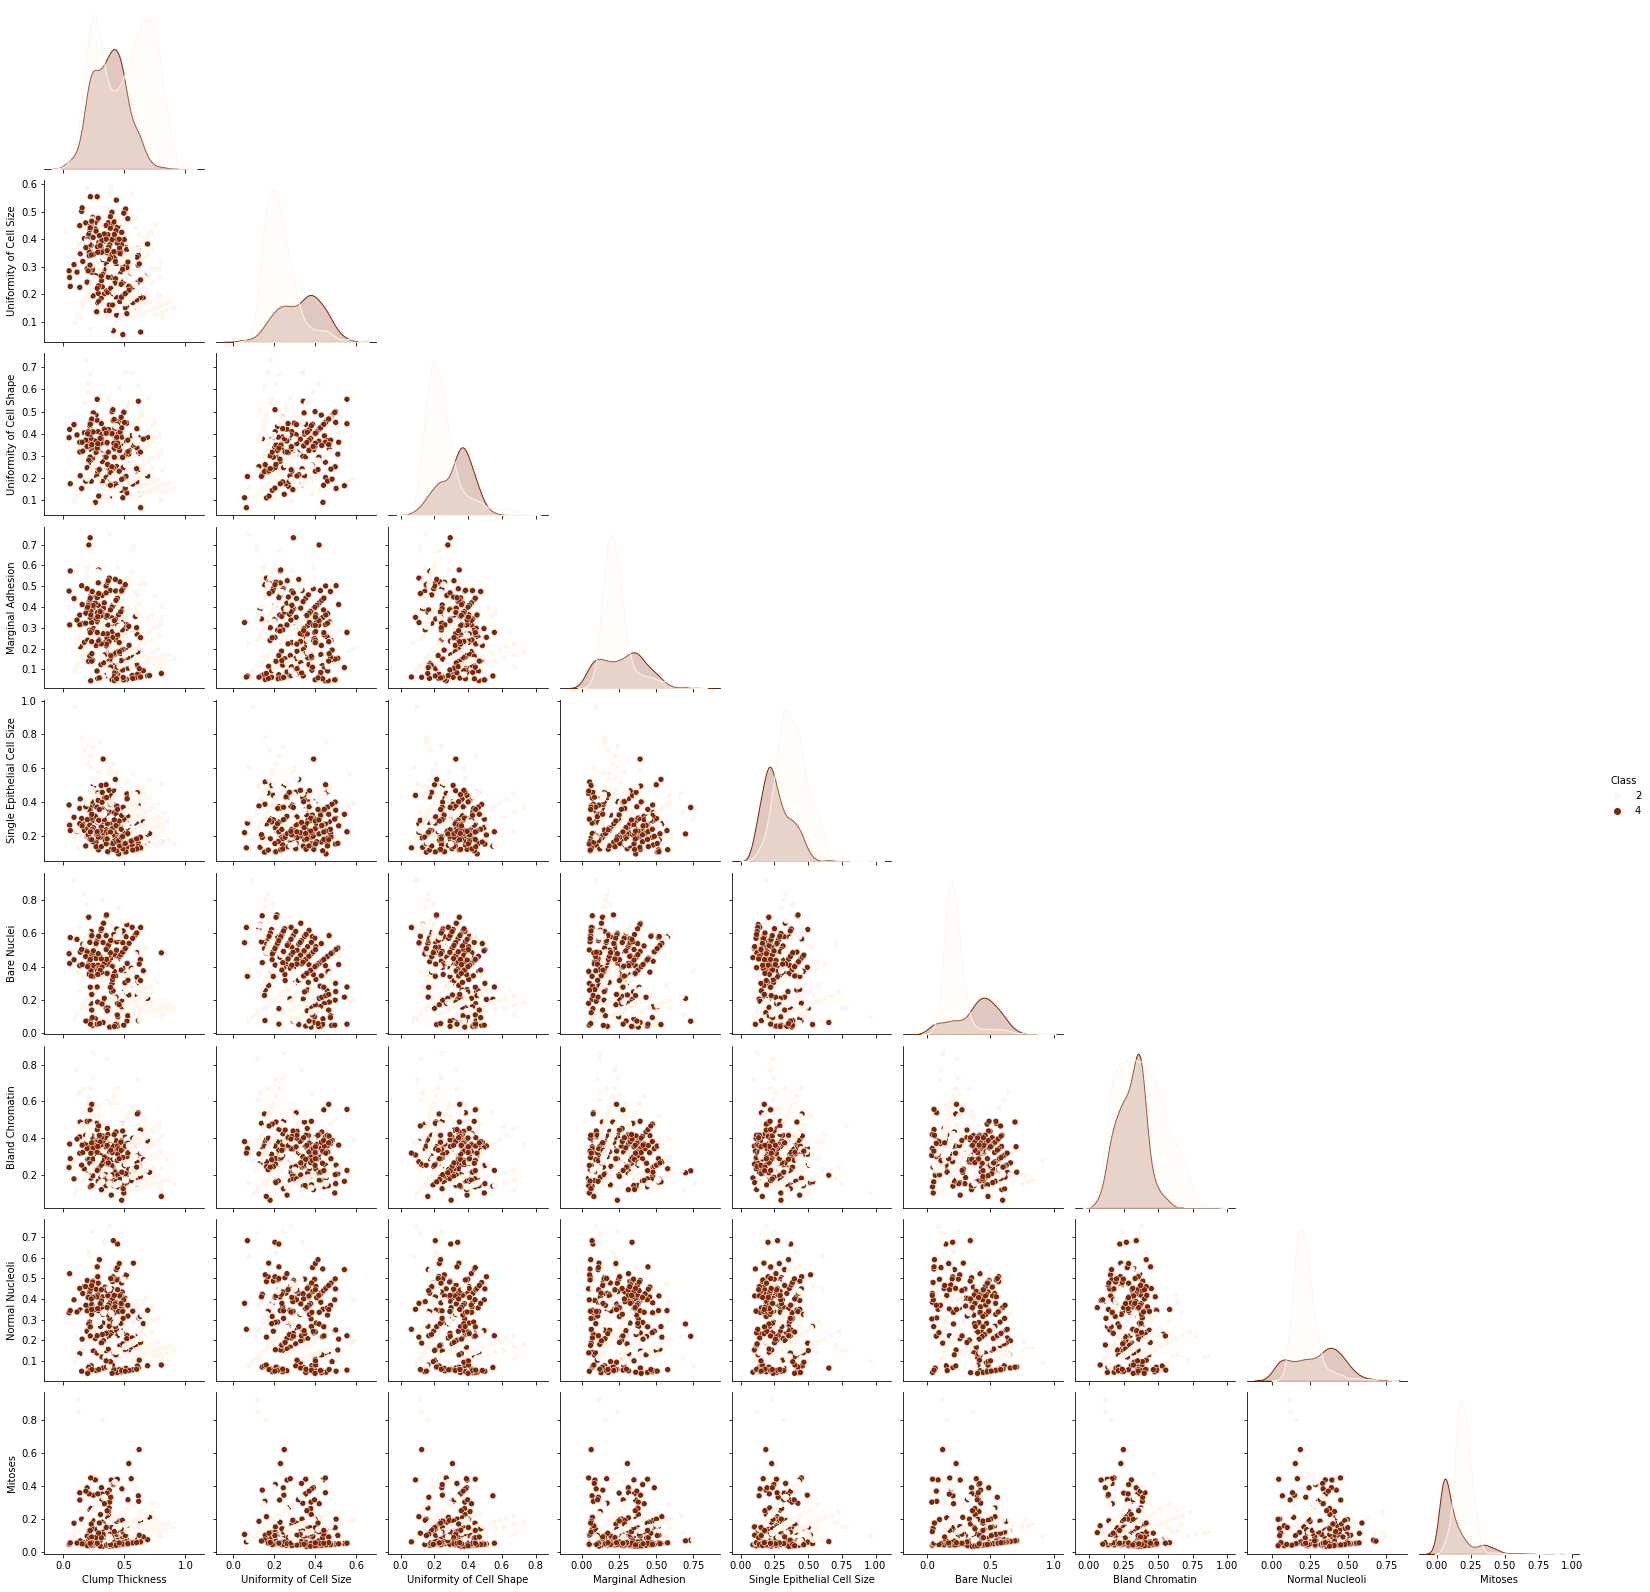

In [141]:
NORMdata = pd_data.copy()
NORMdata.iloc[:,:-1] =  Normalizer().fit_transform(NORMdata.iloc[:,:-1])

sns.pairplot(NORMdata,corner=True, hue="Class", palette='Oranges')

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (699). n_quantiles is set to n_samples.
  warnings.warn(


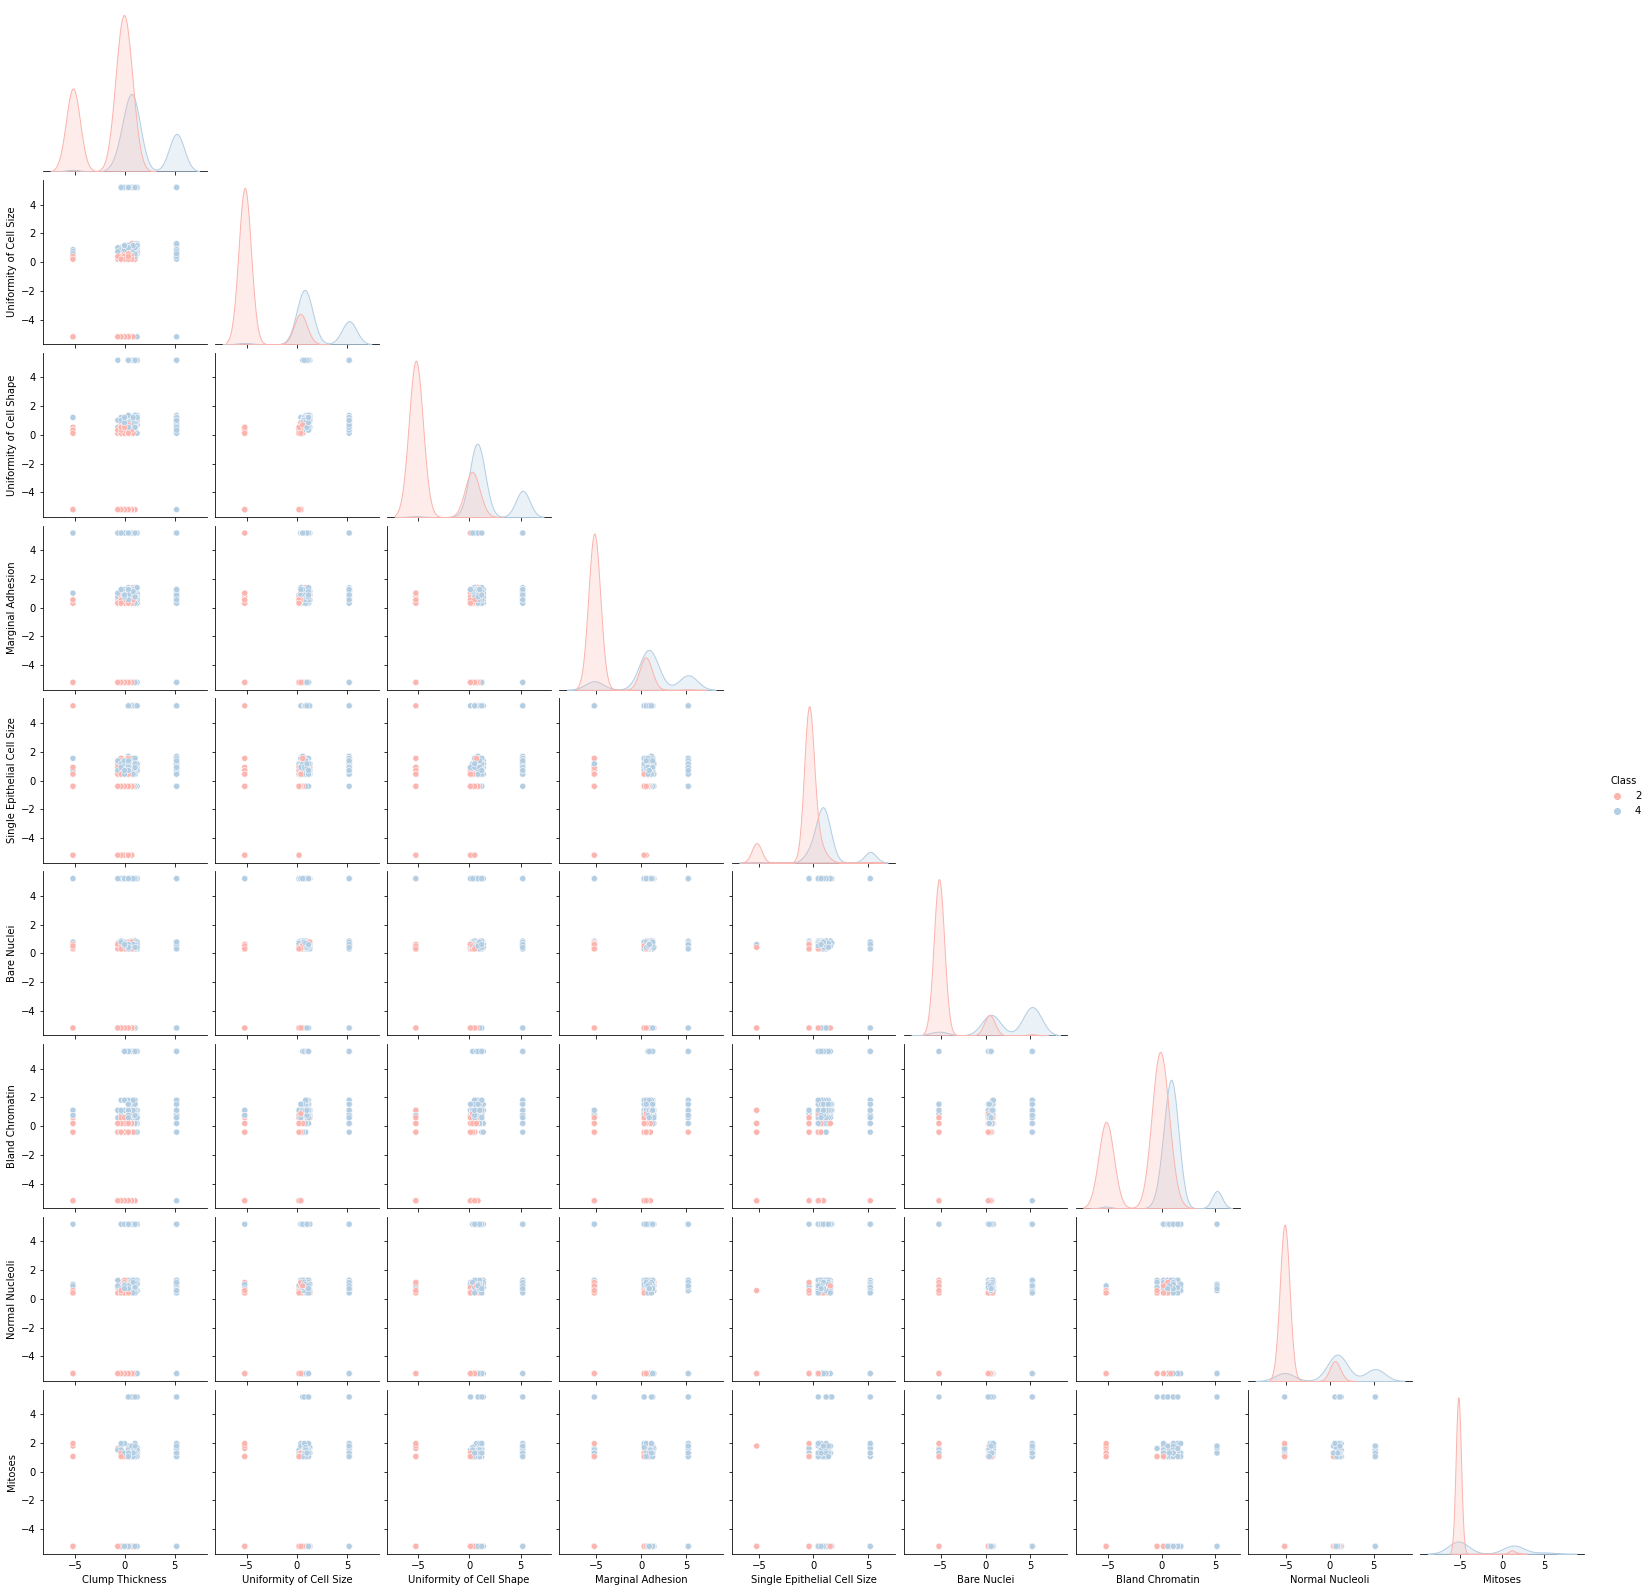

In [144]:
Q_NORMdata = pd_data.copy()
Q_NORMdata.iloc[:,:-1] =   QuantileTransformer(output_distribution="normal").fit_transform(Q_NORMdata.iloc[:,:-1])

sns.pairplot(Q_NORMdata,corner=True, hue="Class", palette='Pastel1')

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (699). n_quantiles is set to n_samples.
  warnings.warn(


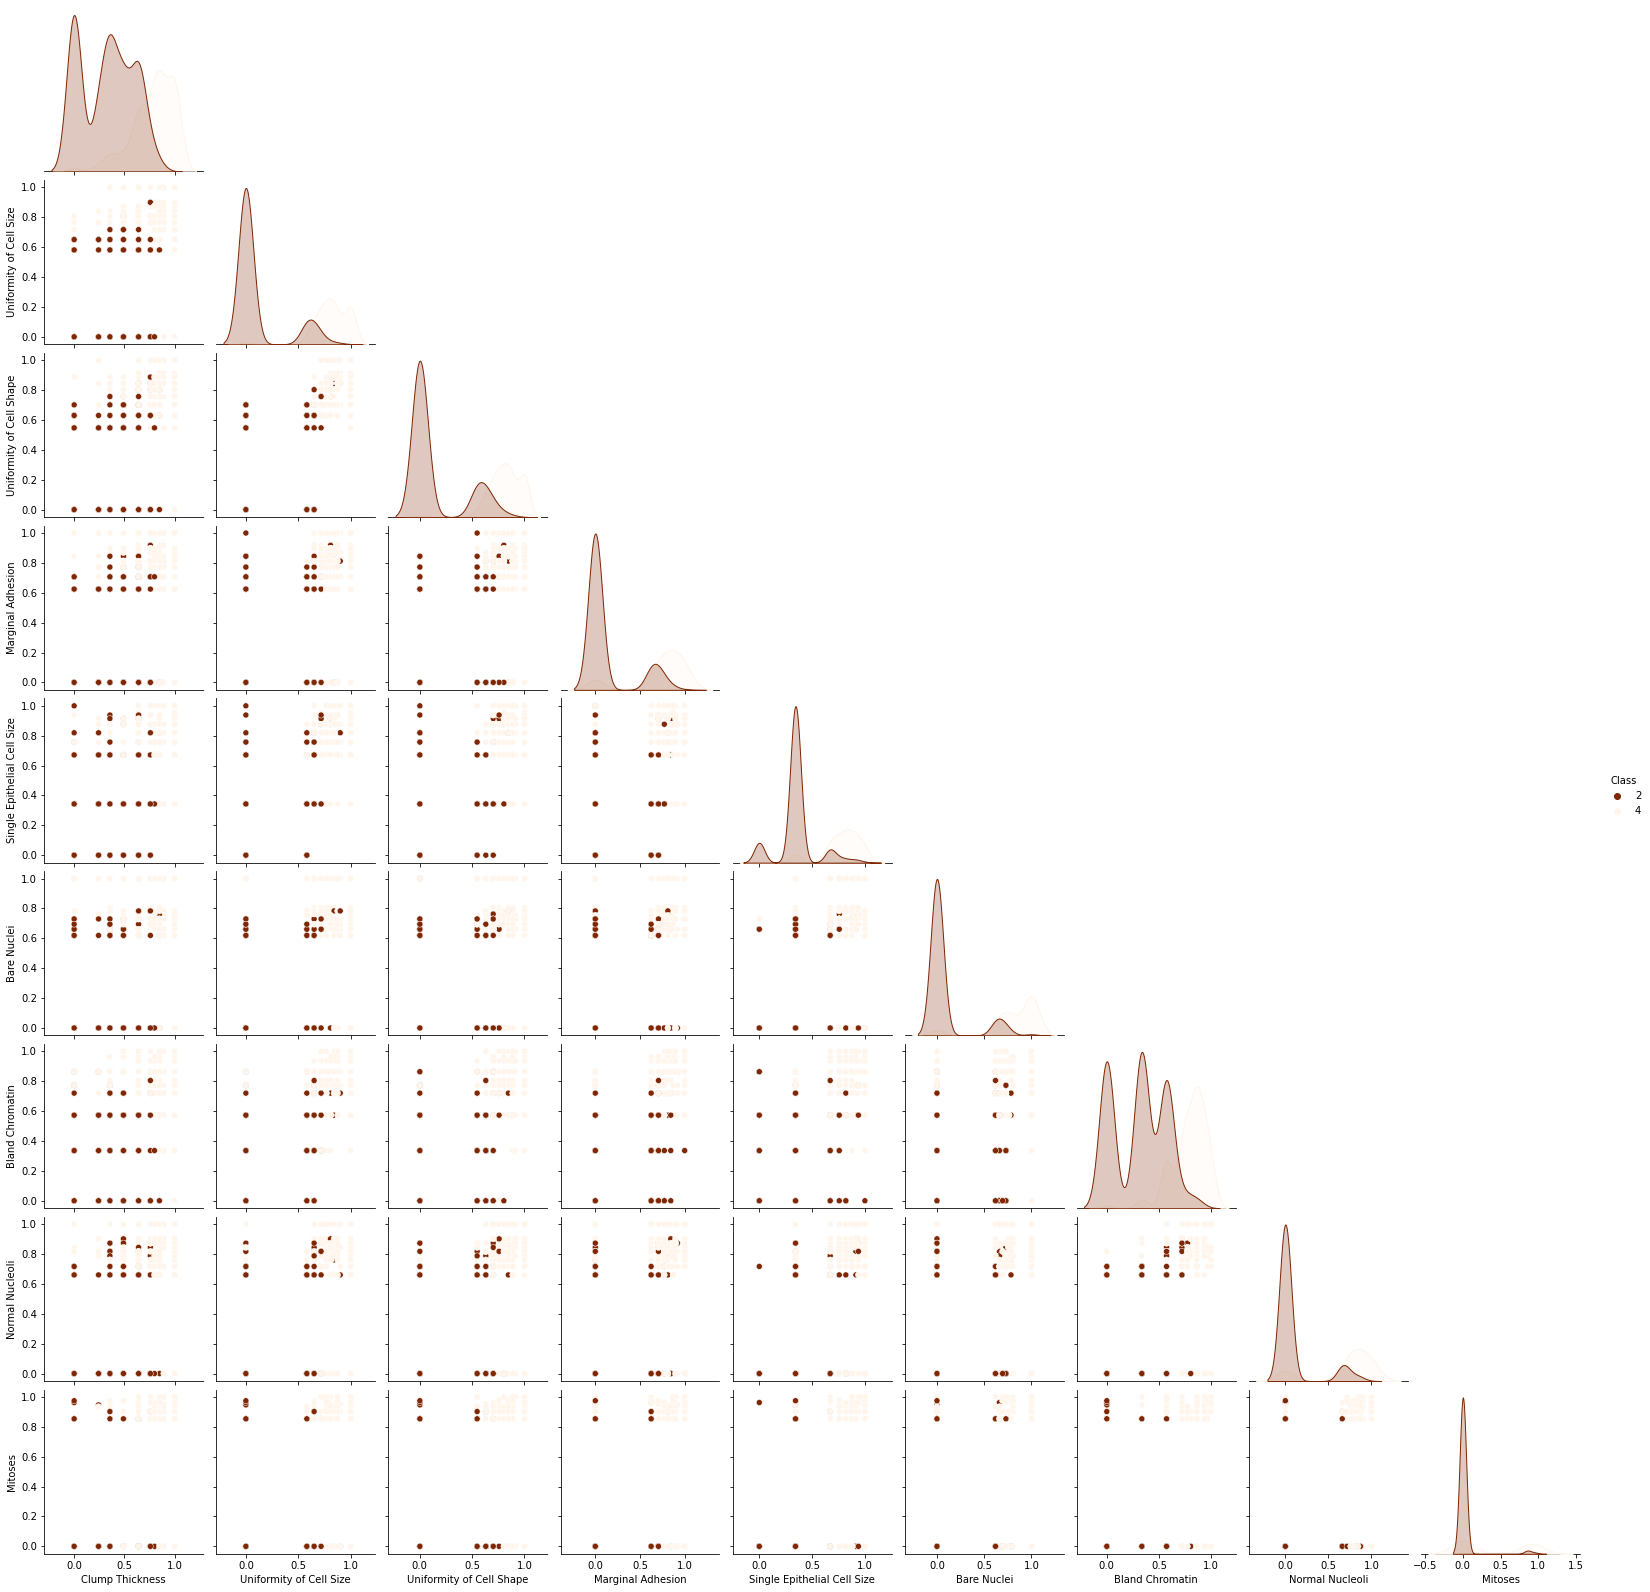

In [145]:
Q_data = pd_data.copy()
Q_data.iloc[:,:-1] =   QuantileTransformer().fit_transform(Q_data.iloc[:,:-1])

sns.pairplot(Q_data,corner=True, hue="Class", palette='Oranges_r')

In [147]:
pd_data.head()

Clump Thickness Uniformity of Cell Size Uniformity of Cell Shape  \
0               5                       1                        1   
1               5                       4                        4   
2               3                       1                        1   
3               6                       8                        8   
4               4                       1                        1   

  Marginal Adhesion Single Epithelial Cell Size Bare Nuclei Bland Chromatin  \
0                 1                           2           1               3   
1                 5                           7          10               3   
2                 1                           2           2               3   
3                 1                           3           4               3   
4                 3                           2           1               3   

  Normal Nucleoli Mitoses Class  
0               1       1     2  
1               2       1     2  
2               1       1     2  
3               7       1     2  
4               1       1     2

______________

### Defining Dictionary of Models

In [181]:
MODELS = {'logistic_r', 'svc', 'tree', 'forest', 'knn', 'adaboost', 'gnb', 'nn'}
breast_cancer_wisconsin_dict = {}    

## Train and Test set

In [204]:
X = pd_data.iloc[:,:-1]
y = pd_data["Class"]

In [247]:
X_train, X_test, y_train, y_test = train_test_split( X.astype(int), y.astype(int), test_size=0.20, random_state=0)


In [248]:
norm = Normalizer()
norm.fit(X_train)
X_train = norm.transform(X_train)

X_test = norm.transform(X_test)

In [290]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    print(classification_report(y_test, prediction))
    print(confusion_matrix (y_test, prediction))
    ConfusionMatrixDisplay.from_predictions(y_test, prediction);
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    W_recall = recall_score(y_test, prediction,average='weighted')
    malignant_recall = recall_score(y_test, prediction,pos_label=4,average='binary')
    
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])
    table.append(['weighted_Recall',W_recall])
    table.append(['malignant_Recall',malignant_recall])

    
    prediction_trn = curr_model.predict(X_train)
    accuracy_trn = accuracy_score(y_train, prediction_trn)
    weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
    macro_f1_trn = f1_score(y_train, prediction_trn, average='macro')
    W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
    malignant_recall_trn = recall_score(y_train, prediction_trn,pos_label=4,average='binary')
    
    table.append(['Accuracy (tarin)',accuracy_trn])
    table.append(['weighted_f1 (tarin)', weighted_f1_trn])
    table.append(['macro_f1 (tarin)',macro_f1_trn])
    table.append(['weighted_Recall (tarin)',W_recall_trn])
    table.append(['malignant_Recall (tarin)',malignant_recall_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

    return prediction

## 1. LogisticRegression for Classification

In [291]:
logistic_r = LogisticRegression(class_weight='balanced',random_state=0)
logistic_r.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

### LogisticRegression Analysis

              precision    recall  f1-score   support

           2       0.97      0.85      0.91        85
           4       0.80      0.96      0.88        55

    accuracy                           0.89       140
   macro avg       0.89      0.91      0.89       140
weighted avg       0.91      0.89      0.89       140

[[72 13]
 [ 2 53]]
+--------------------------+----------+
| Parameters / Metrics     |    Tuned |
+==========================+==========+
| Accuracy                 | 0.892857 |
+--------------------------+----------+
| weighted_f1              | 0.894021 |
+--------------------------+----------+
| macro_f1                 | 0.890847 |
+--------------------------+----------+
| weighted_Recall          | 0.892857 |
+--------------------------+----------+
| malignant_Recall         | 0.963636 |
+--------------------------+----------+
| Accuracy (tarin)         | 0.874776 |
+--------------------------+----------+
| weighted_f1 (tarin)      | 0.876718 |
+-------------

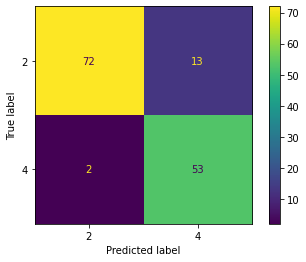

In [370]:
breast_cancer_wisconsin_dict['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(breast_cancer_wisconsin_dict['logistic_r'])

## 2. Support vector classification

In [293]:
svc = SVC(class_weight ='balanced' ).fit(X_train, y_train)

In [294]:
parameters = {
    'C':[0.1,1,9,10, 47,50,57, 100,],
    'gamma': ['scale','auto',0.1, 0.01, 0.09, 0.001, 0.002, 0.005],
    'kernel': ['rbf', 'sigmoid']
}

svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=9, gamma=0.09, kernel=rbf................................
[CV 1/5; 1/10] END .C=9, gamma=0.09, kernel=rbf;, score=0.839 total time=   0.0s
[CV 2/5; 1/10] START C=9, gamma=0.09, kernel=rbf................................
[CV 2/5; 1/10] END .C=9, gamma=0.09, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5; 1/10] START C=9, gamma=0.09, kernel=rbf................................
[CV 3/5; 1/10] END .C=9, gamma=0.09, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5; 1/10] START C=9, gamma=0.09, kernel=rbf................................
[CV 4/5; 1/10] END .C=9, gamma=0.09, kernel=rbf;, score=0.884 total time=   0.0s
[CV 5/5; 1/10] START C=9, gamma=0.09, kernel=rbf................................
[CV 5/5; 1/10] END .C=9, gamma=0.09, kernel=rbf;, score=0.838 total time=   0.0s
[CV 1/5; 2/10] START C=1, gamma=0.09, kernel=rbf................................
[CV 1/5; 2/10] END .C=1, gamma=0.09, kernel=rbf;

{'kernel': 'rbf', 'gamma': 'scale', 'C': 57}

In [295]:
svc_model.best_estimator_

SVC(C=57, class_weight='balanced')

## Support vector classification Analysis

              precision    recall  f1-score   support

           2       0.95      0.88      0.91        85
           4       0.84      0.93      0.88        55

    accuracy                           0.90       140
   macro avg       0.89      0.90      0.90       140
weighted avg       0.90      0.90      0.90       140

[[75 10]
 [ 4 51]]
+--------------------------+--------------------+
| Parameters / Metrics     | Tuned              |
+==========================+====================+
| kernel                   | rbf                |
+--------------------------+--------------------+
| gamma                    | scale              |
+--------------------------+--------------------+
| C                        | 57                 |
+--------------------------+--------------------+
| Accuracy                 | 0.9                |
+--------------------------+--------------------+
| weighted_f1              | 0.9007569386038689 |
+--------------------------+--------------------+
| ma

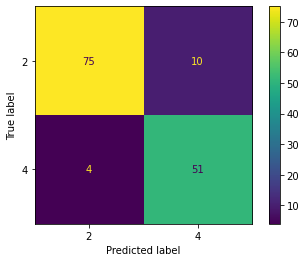

In [371]:
breast_cancer_wisconsin_dict['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(breast_cancer_wisconsin_dict['svc'])

## Decision tree

In [297]:
tree = DecisionTreeClassifier(class_weight ='balanced').fit(X_train, y_train)

In [298]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 8.103605819788694, 'min_samples_split': 0.08712929970154071}

## Decision tree Analysis

              precision    recall  f1-score   support

           2       0.85      0.89      0.87        85
           4       0.82      0.76      0.79        55

    accuracy                           0.84       140
   macro avg       0.84      0.83      0.83       140
weighted avg       0.84      0.84      0.84       140

[[76  9]
 [13 42]]
+--------------------------+-----------+
| Parameters / Metrics     |     Tuned |
+==========================+===========+
| max_depth                | 8.10361   |
+--------------------------+-----------+
| min_samples_split        | 0.0871293 |
+--------------------------+-----------+
| Accuracy                 | 0.842857  |
+--------------------------+-----------+
| weighted_f1              | 0.841698  |
+--------------------------+-----------+
| macro_f1                 | 0.833008  |
+--------------------------+-----------+
| weighted_Recall          | 0.842857  |
+--------------------------+-----------+
| malignant_Recall         | 0.763636  

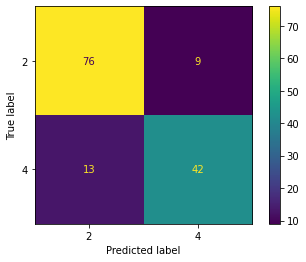

In [372]:
breast_cancer_wisconsin_dict['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(breast_cancer_wisconsin_dict['tree'])

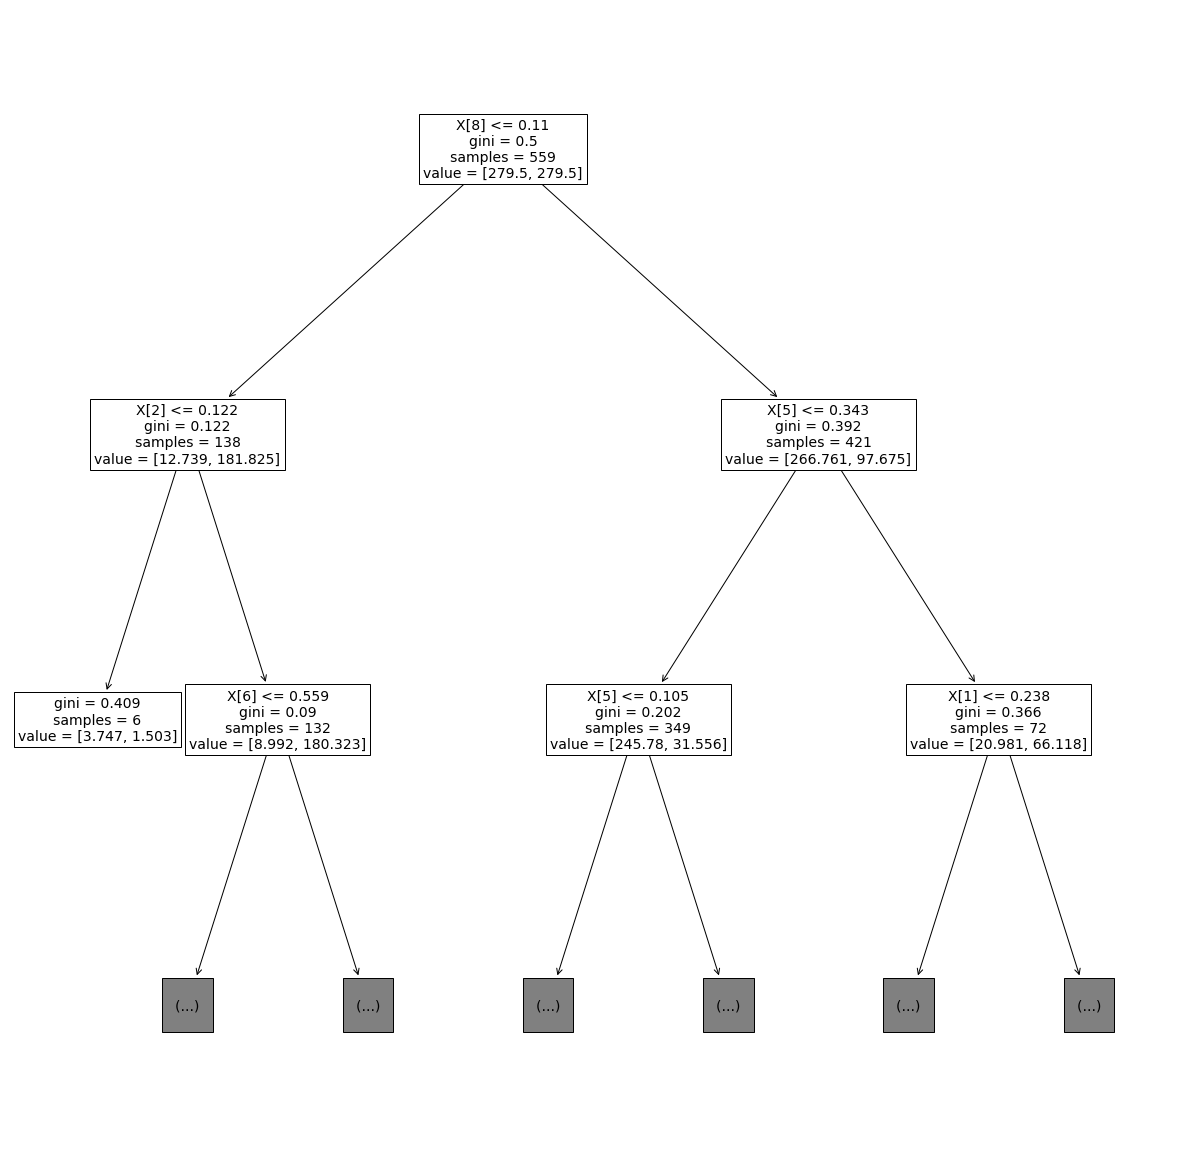

In [300]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

In [301]:
forest = RandomForestClassifier(class_weight='balanced')
forest = forest.fit(X_train, y_train)

In [277]:
parameters = {
    'n_estimators': range(1,200),
    'max_depth': scipy.stats.uniform(1, 150),
    "criterion": ["gini", "entropy"]
}
forest_model = RandomizedSearchCV(forest, parameters,n_jobs=4,cv=3, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'criterion': 'entropy', 'max_depth': 81.6059844173516, 'n_estimators': 33}

### Random Forest Analysis

              precision    recall  f1-score   support

           2       0.85      0.89      0.87        85
           4       0.82      0.76      0.79        55

    accuracy                           0.84       140
   macro avg       0.84      0.83      0.83       140
weighted avg       0.84      0.84      0.84       140

[[76  9]
 [13 42]]
+--------------------------+-----------+
| Parameters / Metrics     |     Tuned |
+==========================+===========+
| max_depth                | 8.10361   |
+--------------------------+-----------+
| min_samples_split        | 0.0871293 |
+--------------------------+-----------+
| Accuracy                 | 0.842857  |
+--------------------------+-----------+
| weighted_f1              | 0.841698  |
+--------------------------+-----------+
| macro_f1                 | 0.833008  |
+--------------------------+-----------+
| weighted_Recall          | 0.842857  |
+--------------------------+-----------+
| malignant_Recall         | 0.763636  

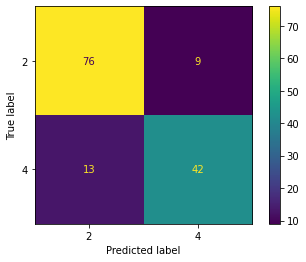

In [379]:
breast_cancer_wisconsin_dict['forest'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(breast_cancer_wisconsin_dict['forest'])

## 5. K-nearest neighbours


Fitting and hyperparameter search

In [342]:


knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [343]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'], 'leaf_size': scipy.stats.uniform(1, 50)}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
best Hyperparameters = {'leaf_size': 12.116069412579382, 'n_neighbors': 18, 'weights': 'distance'}


              precision    recall  f1-score   support

           2       0.95      0.92      0.93        85
           4       0.88      0.93      0.90        55

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140

[[78  7]
 [ 4 51]]
+--------------------------+--------------------+
| Parameters / Metrics     | Tuned              |
+==========================+====================+
| leaf_size                | 12.116069412579382 |
+--------------------------+--------------------+
| n_neighbors              | 18                 |
+--------------------------+--------------------+
| weights                  | distance           |
+--------------------------+--------------------+
| Accuracy                 | 0.9214285714285714 |
+--------------------------+--------------------+
| weighted_f1              | 0.9217658235993247 |
+--------------------------+--------------------+
| ma

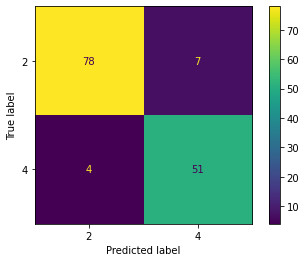

In [374]:
breast_cancer_wisconsin_dict["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(breast_cancer_wisconsin_dict['knn'])

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [388]:


adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [389]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=5, n_iter=50).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters = {'learning_rate': 0.5804920394698153, 'n_estimators': 94}


              precision    recall  f1-score   support

           2       0.94      0.96      0.95        85
           4       0.94      0.91      0.93        55

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140

[[82  3]
 [ 5 50]]
+--------------------------+-----------+
| Parameters / Metrics     |     Tuned |
+==========================+===========+
| learning_rate            |  0.580492 |
+--------------------------+-----------+
| n_estimators             | 94        |
+--------------------------+-----------+
| Accuracy                 |  0.942857 |
+--------------------------+-----------+
| weighted_f1              |  0.94266  |
+--------------------------+-----------+
| macro_f1                 |  0.939707 |
+--------------------------+-----------+
| weighted_Recall          |  0.942857 |
+--------------------------+-----------+
| malignant_Recall         |  0.909091 

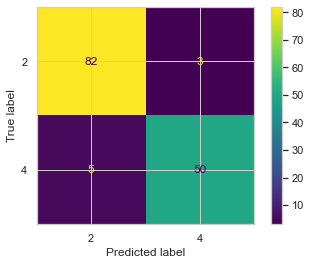

In [390]:
breast_cancer_wisconsin_dict["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(breast_cancer_wisconsin_dict['adaboost'])

## 7. Gaussian Naive Bayes classification

In [352]:


naive_bayes = GaussianNB().fit(X_train, y_train)

In [353]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

              precision    recall  f1-score   support

           2       0.97      0.81      0.88        85
           4       0.77      0.96      0.85        55

    accuracy                           0.87       140
   macro avg       0.87      0.89      0.87       140
weighted avg       0.89      0.87      0.87       140

[[69 16]
 [ 2 53]]
+--------------------------+----------+
| Parameters / Metrics     |    Tuned |
+==========================+==========+
| Accuracy                 | 0.871429 |
+--------------------------+----------+
| weighted_f1              | 0.872917 |
+--------------------------+----------+
| macro_f1                 | 0.869727 |
+--------------------------+----------+
| weighted_Recall          | 0.871429 |
+--------------------------+----------+
| malignant_Recall         | 0.963636 |
+--------------------------+----------+
| Accuracy (tarin)         | 0.887299 |
+--------------------------+----------+
| weighted_f1 (tarin)      | 0.88919  |
+-------------

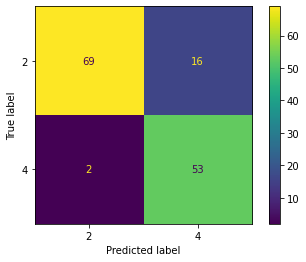

In [376]:
breast_cancer_wisconsin_dict["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(breast_cancer_wisconsin_dict['gnb'])

## 8. Neural Network classification

In [355]:
import warnings
warnings.filterwarnings("ignore")

mlp = MLPClassifier()

In [356]:
# param_distribution  = [
  
#     {                    'max_iter':range(1000, 1500),         
#                 'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
#                         'learning_rate':['constant', 'invscaling', 'adaptive'],
#                      'activation': ['identity', 'logistic', 'tanh', 'relu'],
        
#         'hidden_layer_sizes': [(scipy.stats.randint(low=2**5, high=2**11+1).rvs(), )]}
#     for _ in range(100)] + [
#     {'hidden_layer_sizes': (
#             scipy.stats.randint(low=2 ** 5, high=2 ** 11 + 1).rvs(),
#             scipy.stats.randint(low=2 ** 5, high=2 ** 11 + 1).rvs(),
#     )} for i in range(100)

    
# ]

param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))




mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution,cv=3, verbose=1, random_state=0,n_jobs=7, n_iter=50)
mlp_randomized.fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters = {'leaf_size': 12.116069412579382, 'n_neighbors': 18, 'weights': 'distance'}
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters = {'leaf_size': 12.116069412579382, 'n_neighbors': 18, 'weights': 'distance'}


### 8. Neural Network classification Analysis

              precision    recall  f1-score   support

           2       0.95      0.92      0.93        85
           4       0.88      0.93      0.90        55

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140

[[78  7]
 [ 4 51]]
+--------------------------+-----------------------+
| Parameters / Metrics     | Tuned                 |
+==========================+=======================+
| alpha                    | 0.0006306667861780034 |
+--------------------------+-----------------------+
| learning_rate            | constant              |
+--------------------------+-----------------------+
| max_iter                 | 1257                  |
+--------------------------+-----------------------+
| Accuracy                 | 0.9214285714285714    |
+--------------------------+-----------------------+
| weighted_f1              | 0.9217658235993247    |
+-----------------

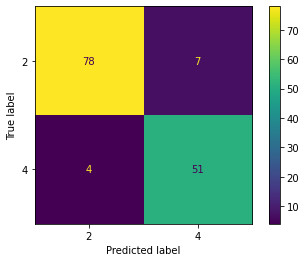

In [377]:
breast_cancer_wisconsin_dict["nn"] = {"model":mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(breast_cancer_wisconsin_dict['nn'])

+------------+----------+----------+----------+------------+----------+-----------+------------+---------------+
| model      |      acc |     w.f1 |    w.rec |   clas.rec |   tr.acc |   tr.w.f1 |   tr.w.rec |   tr.clas.rec |
+============+==========+==========+==========+============+==========+===========+============+===============+
| tree       | 0.842857 | 0.841698 | 0.842857 |   0.763636 | 0.953488 |  0.953293 |   0.953488 |      0.913978 |
+------------+----------+----------+----------+------------+----------+-----------+------------+---------------+
| knn        | 0.921429 | 0.921766 | 0.921429 |   0.927273 | 1        |  1        |   1        |      1        |
+------------+----------+----------+----------+------------+----------+-----------+------------+---------------+
| forest     | 0.842857 | 0.841698 | 0.842857 |   0.763636 | 0.953488 |  0.953293 |   0.953488 |      0.913978 |
+------------+----------+----------+----------+------------+----------+-----------+------------+

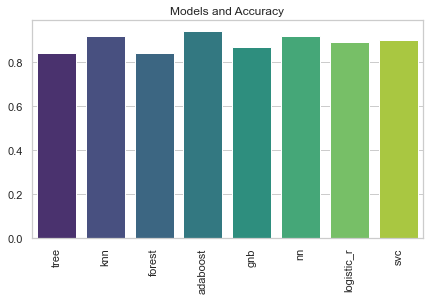

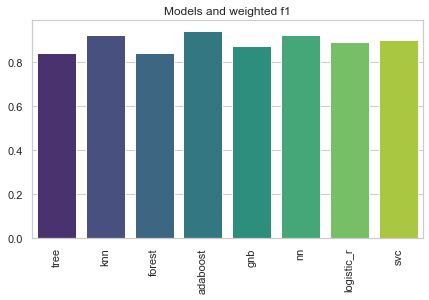

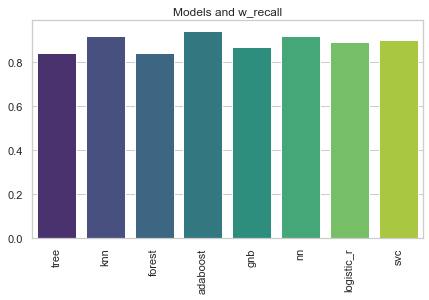

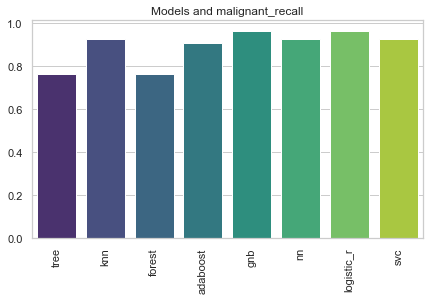

In [384]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score


def cross_checking_model_results(dictionary):
    table = [["model", "acc", "w.f1", 'w.rec', 'clas.rec',
              'tr.acc','tr.w.f1', 'tr.w.rec', 'tr.clas.rec']]
    x_models = []
    y_accuracy = []
    y_wf1 = []
    w_recall = []
    m_recall = []
    
    trny_accuracy = []
    trny_wf1 = []
    trnw_recall = []
    trnm_recall = []

    for model_key in MODELS:
        model = dictionary[model_key]['model']
        
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        weighted_f1 = f1_score(y_test, prediction, average='weighted')
        W_recall = recall_score(y_test, prediction,average='weighted')
        malignant_recall = recall_score(y_test, prediction,pos_label=4,average='binary')
        
        prediction_trn = model.predict(X_train)
        accuracy_trn = accuracy_score(y_train, prediction_trn)
        weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
        W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
        malignant_recall_trn = recall_score(y_train, prediction_trn,pos_label=4,average='binary')
        table.append([model_key, accuracy, weighted_f1, W_recall,malignant_recall,
                     accuracy_trn, weighted_f1_trn, W_recall_trn,malignant_recall_trn])
        
        x_models.append(model_key)
        y_accuracy.append(accuracy)
        y_wf1.append(weighted_f1)
        w_recall.append(W_recall)
        m_recall.append(malignant_recall)
        
        trny_accuracy.append(accuracy_trn)
        trny_wf1.append(weighted_f1_trn)
        trnw_recall.append(W_recall_trn)
        trnm_recall.append(malignant_recall_trn)
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_accuracy, palette="viridis")
    ax1.set_title('Models and Accuracy')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_wf1, palette="viridis")
    ax2.set_title('Models and weighted f1')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=w_recall, palette="viridis")
    ax2.set_title('Models and w_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=m_recall, palette="viridis")
    ax2.set_title('Models and malignant_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(breast_cancer_wisconsin_dict)